## Analyzing language across Feminist and Men's Rights subreddits

In [92]:
#Imports 

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus                     import stopwords
from nltk.stem                       import WordNetLemmatizer
from nltk.tokenize                   import RegexpTokenizer 
import time
import json
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction import stop_words 
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#import data 

df = pd.read_csv('data/scraping_data.csv')

# Data Cleaning and EDA

In [3]:
df.shape

(5000, 4)

In [122]:
df

,title,selftext,num_comments,target
0,Oh nooo..... 4% is soooo baaad,thisismissingtext,4,0
1,Black men matter,"Now before you read the title and downvote, le...",1,0
2,This is beyond repulsive. India has one of the...,thisismissingtext,17,0
3,We should start caring about male domestic abu...,[removed],0,0
4,Have you guys ever faced discrimination from t...,I was doing some research on healthcare discri...,1,0
...,...,...,...,...
4995,At a time when tattoos were beyond stigmatized...,thisismissingtext,0,1
4996,Can’t believe this is still a thing (my mom ha...,thisismissingtext,0,1
4997,How is this still a thing? (My mom has been a ...,thisismissingtext,0,1
4998,Random,[removed],0,1


In [6]:
#replacing empty rows with NaN

df = df.replace(r'^\s*$', np.NaN, regex=True)

In [7]:
df.isnull().sum()

title              0
selftext        2805
num_comments       0
target             0
dtype: int64

In [8]:
#Filling NaNRows

df.fillna('thisismissingtext', inplace=True)

In [9]:
df.isnull().sum()

title           0
selftext        0
num_comments    0
target          0
dtype: int64

# Exploring words frequencies 

### Using word cloud for aesthetic value not analysis. 

(-0.5, 743.5, 543.5, -0.5)

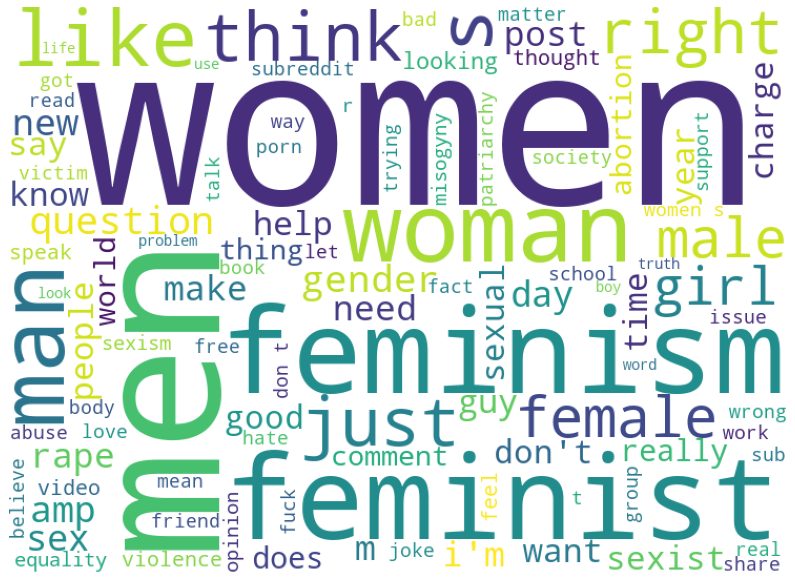

In [11]:
text = ' '
stopwords = stop_words.ENGLISH_STOP_WORDS
  
# iterate through the csv file 
for x in df[df['target']== 1]['title']: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split(' ') 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
#plt.savefig('../images/reddit_wordcloud.png')

In [12]:
def plot_most_frequent_words(dataframes, titles):
    
    # The count inidcates where in the subplot to go
    count = 0
    fig   = plt.figure(figsize   = (24,20),
                       facecolor = "white")
    
    # Enumerating allows for the list of titles to be referenced
    for d, dataframe in enumerate(dataframes):
        
        # Updating the location
        count += 1
        ax    = fig.add_subplot(2, 2, count)
        
        # Creating the graph
        sns.barplot(x       = 0,
                    y       = dataframe.index,
                    data    = dataframe,
                    palette = "deep")
        
        # Setting the graph parameters
        plt.title(f"Most Common Words From {titles[d]}", size = 20)
        plt.xlabel("Number Of Occurences", size = 18)
        plt.ylabel("Word", size = 18)
        plt.xticks(size = 16)
        plt.yticks(size = 17)



In [13]:
from nltk.corpus import stopwords
#Adding more stop words 

new_stopwords = ["like", "just", "https", "ve",
                 "don", "know", 'man', 'men']

stopwords = stopwords.words('english')

stopwords.extend(new_stopwords)

In [14]:
# Instantiating the count vectorizer

vectorizer = CountVectorizer()

# Masking the vectorizer with English stop words

cvec_fem = CountVectorizer(stop_words = stopwords)
cvec_men = CountVectorizer(stop_words = stopwords)

# Subsetting the dataframe
fem = df[df["target"] == 1]
men = df[df["target"] == 0]

# Fit-transforming the vectorizer

vec_fem  = cvec_fem.fit_transform(fem["title"])
vec_men = cvec_men.fit_transform(men["title"])

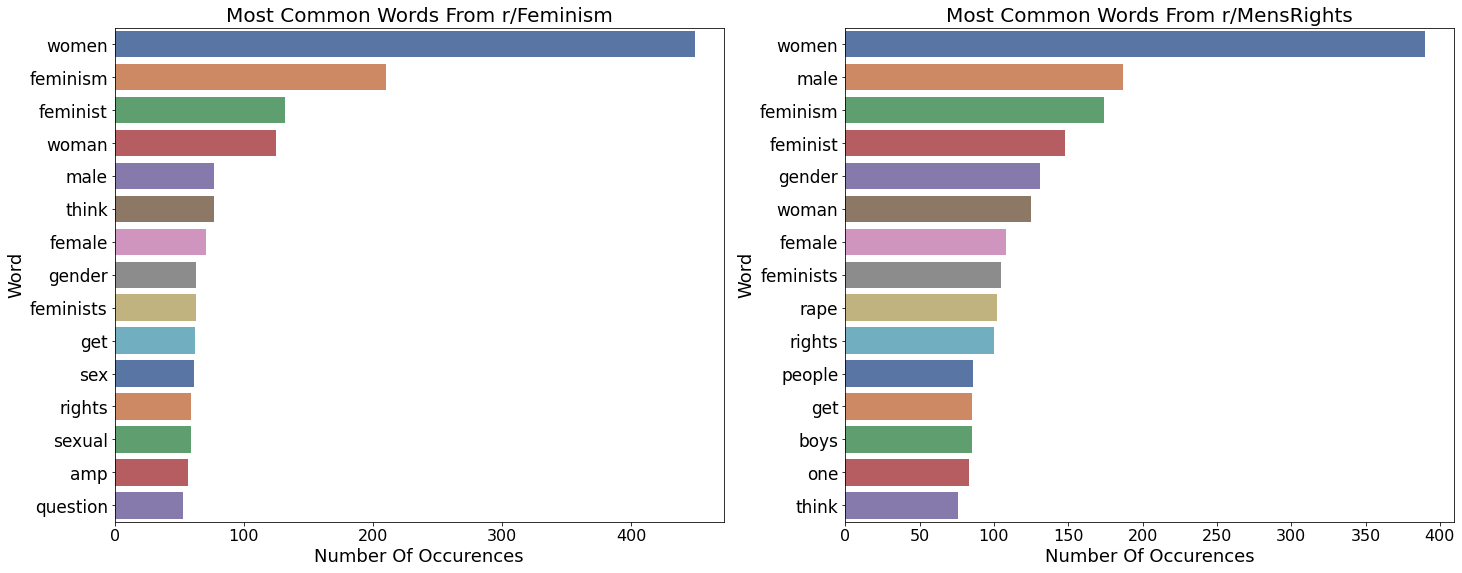

In [15]:
# Saving the vectorized dfs to a new dataframe

fem_vectorized  = pd.DataFrame(vec_fem.toarray(), 
                                      columns = cvec_fem.get_feature_names() )

men_vectorized = pd.DataFrame(vec_men.toarray(), 
                                      columns = cvec_men.get_feature_names())

# Getting the 15 most frequent words from each

vectorized_fem= pd.DataFrame(fem_vectorized.sum().sort_values(ascending = False).head(15))
vectorized_men = pd.DataFrame(men_vectorized.sum().sort_values(ascending = False).head(15))

# Plotting the most common words

plot_most_frequent_words(dataframes = [vectorized_fem, vectorized_men],
                         titles     = ["r/Feminism", "r/MensRights"])

## Exploring Post Popularity 

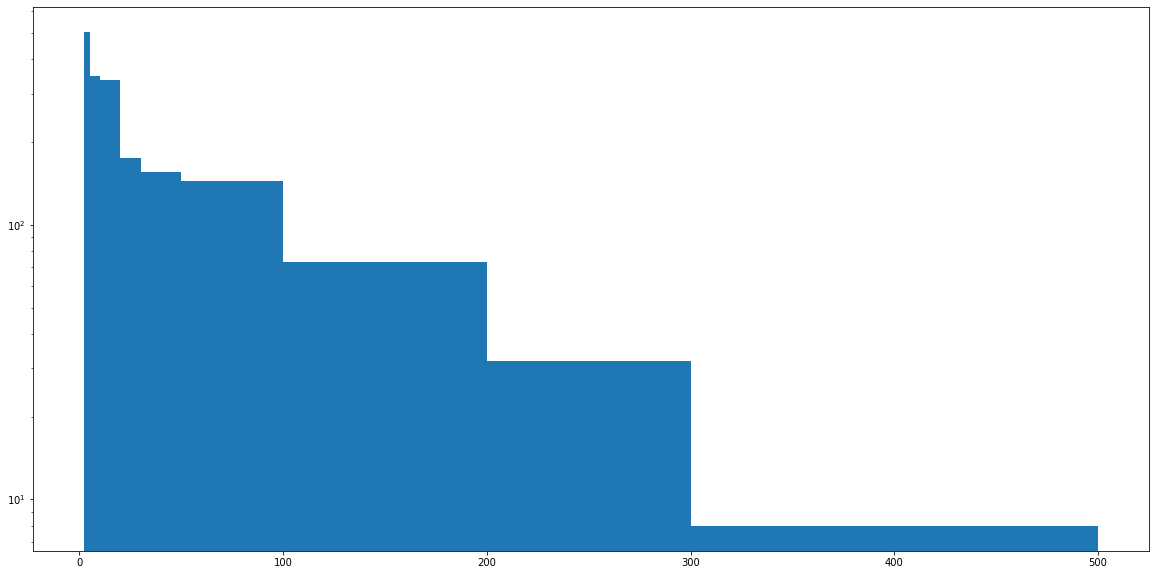

In [16]:
plt.hist(df['num_comments'], bins = [2, 5, 10, 20, 30, 50,
                                       100, 200, 300, 500,
                                                     ], log = True)
fig = plt.gcf()
fig.set_size_inches(20, 10)

font = {'weight' : 'bold',
        'size'   : 32}

plt.rc('font', **font)

# Sentiment Analysis

## Trigger warning: Sexual Assault, Offensive language 

The word rape is one of the most popular words seen in this dataframe. Let's see how each community is addressing this sensitive and pervasive issue.

In [18]:
assault = df[df['title'].str.contains('rape')]

In [121]:
#Feminism posts 

assault[assault['target'] == 1].head()

,title,selftext,num_comments,target
2526,Men who falsely accuse women of rape,[removed],0,1
2654,Goverment should legalise rape... or something...,thisismissingtext,0,1
2655,Government should legalise rape.. or something...,[removed],0,1
2677,If our society teaches women to expect to be r...,[removed],0,1
2753,5 charged with falsely accusing duo of rape,thisismissingtext,0,1


In [120]:
#MensRights posts

assault[assault['target'] == 0].head()

,title,selftext,num_comments,target
28,"Middle school teacher rapes student, and gets ...",thisismissingtext,1,0
35,Woman who accused Maharashtra minister Dhananj...,thisismissingtext,1,0
128,Register complaint against woman for false acc...,thisismissingtext,0,0
131,Nara Lokesh decries 'rape cases' filed against...,thisismissingtext,0,0
134,Woman withdraws rape and sexual assault compla...,thisismissingtext,0,0


In [21]:
#Retroactively adding stopwords that make the models unclear. 

new_stopwords2 = ["maharashtra", "just", "https", "ve",
                 "don", "know"]



stopwords.extend(new_stopwords2)

In [22]:
vectorizer = CountVectorizer()

# Masking the vectorizer with English stop words

cvec_fem_assault = CountVectorizer(stop_words = stopwords, ngram_range=(1, 4))
cvec_men_assault = CountVectorizer(stop_words = stopwords, ngram_range=(1, 5))

# Subsetting the dataframe
fem_assault = assault[assault["target"] == 1]
men_assault = assault[assault["target"] == 0]

# Fit-transforming the vectorizer

vec_fem_assault  = cvec_fem_assault.fit_transform(fem_assault["title"])
vec_men_assault = cvec_men_assault.fit_transform(men_assault["title"])

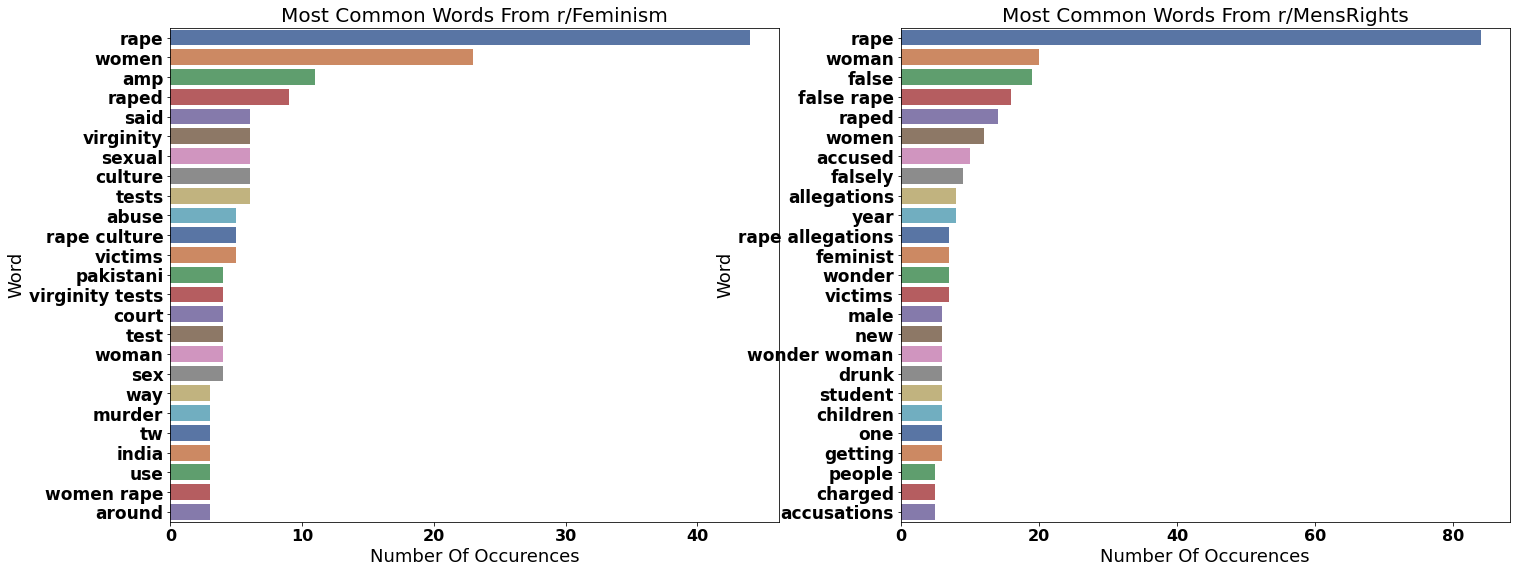

In [23]:
# Saving the vectorized dfs to a new dataframe

fem_vectorized_assault  = pd.DataFrame(vec_fem_assault.toarray(), 
                                      columns = cvec_fem_assault.get_feature_names() )

men_vectorized_assault = pd.DataFrame(vec_men_assault.toarray(), 
                                      columns = cvec_men_assault.get_feature_names())

# Getting the 15 most frequent words from each

vectorized_fem_assault= pd.DataFrame(fem_vectorized_assault.sum().sort_values(ascending = False).head(25))
vectorized_men_assault = pd.DataFrame(men_vectorized_assault.sum().sort_values(ascending = False).head(25))

# Plotting the most common words

plot_most_frequent_words(dataframes = [vectorized_fem_assault, vectorized_men_assault],
                         titles     = ["r/Feminism", "r/MensRights"])

## These communities are talking about the same issues, just in different ways. Let's go broader and explore that.

I will be importing a dataset as described by researchers below.

### information about data

"identifying profane or offensive words are a standard way of starting the investigation over cyberbullying incident. For this reason, initially we created a lexicon form the profane words and we divided our dictionary into the six context;1) Sexual 2) Appearance-related 3) Intellectual 4) Political 5) Racial 6) Combined. We utilized the first five categories of our lexiconas seed terms for collecting tweets from Twitter. Using at least one offensive word,we collected 10,000 tweets for each contextual type for a total of 50,000. Using offensive words in a given tweet does not assure that thetweet is harassing because individuals might utilize the offensivewords in a friendly manner or quotes. Therefore, we rely on human judged annotations for discriminating harassing tweets fromnot-harassing tweets. We acknowledge support from the National Science Foundation (NSF) award CNS 1513721: Context-Aware Harassment Detection on Social Media. Wiki page of this project: http://wiki.knoesis.org/index.php/Context-Aware_Harassment_Detection_on_Social_Media To getting our annotated tweets in five context, please contact the authors via these emails: Mohammadreza Rezvan: mohammadrezarezvan94@gmail.com Saeedeh Shekarpour: sshekarpour1@udayton.edu" 

In [24]:
#Importing CSV

offensive_language = pd.read_csv('data/Harassment-Corpus-master/Harassment Lexicon.csv')

In [26]:
#Creating a list of all the words in the CSV 

bad_word_list = ' '.join([i for i in offensive_language['Sexual']]).split()

In [27]:
#appending to list. 

bad_word_list = []
for col in offensive_language:
    for value in offensive_language[col]:
        bad_word_list.append(value)
    

In [101]:
#Checking Length

len(bad_word_list)

2712

In [31]:
#Looking at the posts that contain words from the bad word list. 
#Can't tell which communities it's from. 

for word in bad_word_list:
    for value in df['title']:
        if word in value:
            print(value)
        

I was a sex-worker, and I think that banning amateur porn is just another manifestation of internalized misogyny. Here’s why:
Purity Balls are disgusting!
All boobies are good boobies. As a mom boobed gal I honestly need to tell myself this more ❤️
Your a man you living in a patriarchy! Here hold my shirt while I make thousands bouncing my boobs on onlyfans.
Women after saying they are not objects and then literally having big boobs
It’s purpose is to make the armor more comfortable for the female to where. If it didn’t have it the chest plate would crush their boobs and make it so uncomfortable all day long when they are wearing it. It’s something that is actually used for a reason that’s not to make them look hot
This is so important. So many men become bitter and sexist because they think we can just flash our boobs and get free stuff.
Gay guy gets charged with Sexual Battery for a 1-second butt slap
Twitter did a temp ban on me rebutting Kill all men with "why not kill all women, w

Men who believe that masculinity is toxic or harmful have lower self-esteem and worse metal health than men who embrace their masculinity as a good thing
So fucking fed up with the sexism in my field
She's praised and seen as a funny girl for this. But if a guy did it lmao.
Quite funny but sadly true
Did you guys see this r/askReddit post? Very insightful
Quite funny and actually a true problem
One of my friends just posted this article on Facebook. The comments were in-line with saying the male character was raped by the female character. The most interesting to me is that this woman is a vocal feminist -- a hopeful sign that at least some feminists actually care about true equality.
body-shaming women isn't okay but doing it to men is okay and funny to most people
Korean scientists developed a technique for diagnosing prostate cancer from urine within only 20 minutes with almost 100% accuracy, using AI and a biosensor, without the need for an invasive biopsy. It may be further utiliz

[SG] Man who conducted own defence acquitted of molest charge
Have you tried construction?? Selling nudes isn’t what it used to be.
Special-education teacher in Oklahoma charged with second-degree rape for having sex with a 16-year-old student, sending him a nude selfie
In Australia, a 22 year old woman has publicly shared the invasive messages from a famous footballer she matched with on a dating site. He sent unsolicited nudes and repeatedly asked to 'suck her toes'. Although the player is being investigated, the backlash she's receiving online is terrible
Can we normalise females sending nudes more
I’m sorry but Feminism isn’t posting your nudes on the internet
Unpopular opinions: Feminism isn’t posting your nudes on the internet
How do I hold someone accountable for sending unsolicited nudes?
The 1976 Hite Report (conducted by Shere Hite) showed that 70% of women do not have orgasms through the "great male thrust", debunking Freudian ideas of female sexuality for the first time. Wh

So fucking fed up with the sexism in my field
Jesus has left the chat #fuckthisbitch
Why are fathers still forced to provide for their children if they dont want to? Why can't men still legally be raped in most of the US? Why do only men still have to sign up for the draft? WE HAVE TO ACTUALLY CONTACT OUR REPRESENTATIVES! Do you know who your representatives are? Find the fuck out
Apparently women can just fuck a 14 year old and say he thought he was 16 EVEN THOUGH THATS STILL MORALLY WRONG ANYWAY
If she sucks up your time rather than enriching it, she’s low value. Dump her. If she lurks on sub posted below block her from your life.
Why are men’s rights activists so fucking retarded
Oh. My. God. I wish I was that parking post. My new meds have made it so hard to spunky, but this shitter just emptied me like a tube of toothpaste. I wonder if she has some sweet thick honkers in the front too. Fuck me.
Prison Protocol: Story Time | How Do Drugs Get Into Jail Or Prison &amp; The Tale Of On

Self authoring completely removed the gender gap in grades and in dropout rates in uni (and ethnicity gap) - why did this work so well on men? Thoughts? Why did it get this such s result? Why is not more research done in field [skip to 13 mins starts talk on self authoring]
Women cannot be free of male dominance without challenging the men of their own class, ethnicity, race and religion
Which ethnic group is more gay
"Of men...and frogs!" Sex bias in the British legal system.
Abuse Of Authority &amp; Police Harassment At It’s Finest ( North Shore Hospital Scandal)
A Pakistani court has banned the use of virginity tests on female rape survivors in a landmark ruling that is being lauded by women’s rights activists. Lahore High Court said a virginity test is ‘invasive and an infringement on the privacy of a woman to her body’.
A Pakistani court has banned the use of virginity tests on female rape survivors in a landmark ruling that is being lauded by women’s rights activists. Lahore High

TypeError: 'in <string>' requires string as left operand, not float

In [35]:
#creating seperate communities. 

fem_df = df[df['target'] == 1]

In [36]:
men_df = df[df['target'] == 0]

In [99]:
#Looking at bad words used in Feminism reddit. 

fem_count =  0 
fem_words =[]
for word in bad_word_list:
    for value in fem_vectorized:
        if word == value:
            fem_count +=1
            fem_words.append(word)
    
print(fem_count)

amateur
boobies
boobs
cock
cum
destroy
fear
fuck
fuck
fucking
goddamn
homo
hymen
nipple
playboy
porn
pornography
prostitute
rape
raped
rapist
sluts
suck
vaginal
whore
arab
canadian
ethnic
native
nigga
niggers
racist
dumbass
asian
libtards
baby
boob
gay
38


In [67]:
# looking at and creating a list of bad words used in mens Rights. 
men_count = 0
men_words = []
for word in bad_word_list:
    for value in men_vectorized:
        if word == value:
            men_count +=1
            men_words.append(word)
print(men_count)

boobs
butt
faggot
fear
fuck
fuck
fucked
fucking
genitals
harder
homo
incest
molest
nude
penile
penis
playgirl
porn
rape
raped
rapist
sluts
suck
testicles
arab
canadian
ethnic
negro
racist
savage
moron
retard
turd
asian
leftist
propaganda
snowflake
baby
breast
gay
40


In [100]:
#Retrieving the whole post for context

fem_bad_posts = []

for word in fem_words:
    for value in fem_df['title']:
        if word in value:
            fem_bad_posts.append(value)
fem_bad_posts

['I was a sex-worker, and I think that banning amateur porn is just another manifestation of internalized misogyny. Here’s why:',
 'All boobies are good boobies. As a mom boobed gal I honestly need to tell myself this more ❤️',
 'Women after saying they are not objects and then literally having big boobs',
 'It’s purpose is to make the armor more comfortable for the female to where. If it didn’t have it the chest plate would crush their boobs and make it so uncomfortable all day long when they are wearing it. It’s something that is actually used for a reason that’s not to make them look hot',
 'This is so important. So many men become bitter and sexist because they think we can just flash our boobs and get free stuff.',
 'Hindu Misogyny: Manusmriti had explicitly promoted child marriages and dowry. "A Kandala, a village pig, a cock, a dog, a menstruating woman, and a eunuch (transgender person) not look at the Brahmanas while they eat.”',
 'Hindu Misogyny : Manusmriti has explicitly pr

In [71]:
#retrieving whole post for context

men_bad_posts = []

for word in men_words:
    for value in men_df['title']:
        if word in value:
            men_bad_posts.append(value)
men_bad_posts

['Your a man you living in a patriarchy! Here hold my shirt while I make thousands bouncing my boobs on onlyfans.',
 'Gay guy gets charged with Sexual Battery for a 1-second butt slap',
 'Twitter did a temp ban on me rebutting Kill all men with "why not kill all women, whites, blacks?"',
 'Legal double standards on sports butt slapping and woke ESPN victim blaming',
 'Because of course, sexual assault is only worth of attention if the abuser is a man and the victim a woman. Note how the headline also says "Grab butt" instead of "Grope" or "Sexually Assault", by the way.',
 'This mf says that I’m butthurt even though he’s obbssed with us. Part 2 anyone?',
 'Believe all accusers. A teen black male falsely accused of stealing a white woman’s cellphone said he feared for his life during the attack that left him “shellshocked.”',
 'Ifear scuicde',
 'These idiots who downvoted me for saying that thinking a man is a rapist and a murderer is an unrealistic fear. My OC has -27 about how it’s a 

In [102]:
len(men_bad_posts)

249

In [118]:
df_bad_men = pd.DataFrame(men_bad_posts)

In [103]:
len(fem_bad_posts)

187

In [114]:
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words = stopwords)

In [58]:
print(fem_count)
print(men_count)

38
40


## EDA Takeaway

Anecdotally these communities seem to talk about the same issues in different ways. You can see in the graph located above that when discussing issues such as sexual assault the most frequent words used with it differ greatly. Further sentiment analysis would need to be conducted to reach any conclusions. 

## Tokenizing Data for Modeling and Export: 

In [ ]:
toke = RegexpTokenizer('\w+') # collect words only
lem = WordNetLemmatizer()     # lemmatize words

In [ ]:
df['cleaned_title'] = df.apply(lambda row: toke.tokenize(row['title']), axis=1)

In [ ]:
df['lem_title'] = df.apply(lambda row: lem.lemmatize(row['title']), axis=1)

In [ ]:
df.head()

In [ ]:
#Exporting data 

df.to_csv('data/cleaned_data.csv', index=False)

df.to_csv('data/clean_toked.csv', index = False)